In [ ]:
import os
import random
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

## 1. 데이터 불러오기

In [ ]:

# 읽어올 데이터의 경로 설정
DATA_IN_PATH = 'E:\\pythonfiles\\DataMiningClass\\teamproject\\모델링\\'
# 데이터를 내보낼 경로 설정
DATA_OUT_PATH = 'E:\\pythonfiles\\DataMiningClass\\teamproject\\모델링\\'
# 읽어올 데이터 이름
TRAIN_CLEAN_DATA = 'kakao_spell_checked.csv'

train_data = pd.read_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, encoding='UTF-8')

## 2. 긍정/부정 binary 변환
'sentiment' 열에 입력

In [ ]:
def senti(x):
    if x >= 4:
        return 1
    elif x <= 2:
        return 0
    else:
        return None
      
train_data['sentiment'] = [senti(x) for x in train_data['평점']]
print(train_data.head())

   Unnamed: 0          이름                          위치  \
0           0  후레쉬빌 삼성역본점  서울 강남구 테헤란로108길 19 부림빌딩 1층   
1           1  후레쉬빌 삼성역본점  서울 강남구 테헤란로108길 19 부림빌딩 1층   
2           2  후레쉬빌 삼성역본점  서울 강남구 테헤란로108길 19 부림빌딩 1층   
3           3  후레쉬빌 삼성역본점  서울 강남구 테헤란로108길 19 부림빌딩 1층   
4           4  후레쉬빌 삼성역본점  서울 강남구 테헤란로108길 19 부림빌딩 1층   

                                                  리뷰  평점    yr  mnt  day  \
0                                 평점관리 알바 의심 되는 곳이네요   1  2022    5   22   
1  주말에 세텍전시 보러 왔다가 세텍 맛집으로 유명한 것 같아 다녀갑니다 오므라이스와 ...   5  2022    5   14   
2                              치즈돈까스 맵고 맛있어요 잘먹고 갑니다   5  2022    5    5   
3      사장님 바쁘신건알겠는데 자리없냐고 여쭤봤는데 바쁜데말걸지말라고 하시면 어떡하시나요   1  2022    4   27   
4  거래처 고객분이랑 간단히 점심을 먹었습니다 치즈앤치즈불돈까스 맵싸하게 참 맛있었어요...   5  2022    4   20   

  region                                           ko_check  sentiment  
0    강남구                                 평점 관리 알바 의심되는 곳이네요        0.0  
1    강남구  주말에 세텍 전시 보러 왔다가 세텍 맛 집으로 유명한 것 같아 다녀갑니다 오므라

## 3. 중복제거/none제거

In [ ]:
train_data = train_data.drop_duplicates(subset=['리뷰'])  # 중복 제거
train_data = train_data.dropna()  # none 제거

- 긍정/부정 별 리뷰 수 확인
- 부정 갯수가 적으므로 부정 갯수에 맞춰서 오버샘플링 수행

In [ ]:
print(train_data['sentiment'].value_counts())

1.0    24646
0.0    10268
Name: sentiment, dtype: int64


## 4. 오버샘플링
- 랜덤오버샘플링 수행
- train, test 8:2로 분할

In [ ]:
X = train_data['리뷰']
y = train_data['sentiment']


In [ ]:
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer

okt = Okt()
tfv = TfidfVectorizer(tokenizer=okt.morphs, ngram_range=(1,2),min_df=3,max_df=0.9)
tfv.fit(X)

tfv_train_X = tfv.transform(X)
print(tfv_train_X)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
sampled_X, sampled_y = oversample.fit_resample(tfv_train_X, y)
print(Counter(sampled_y))

c:\Users\dmb08\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


  (0, 49762)	0.25981989470946737
  (0, 38923)	0.2482079692885725
  (0, 38920)	0.24231614059467427
  (0, 37640)	0.3433995302919431
  (0, 34930)	0.1617407998530141
  (0, 30524)	0.4407191013441419
  (0, 30511)	0.2642350538938129
  (0, 13037)	0.32767816314571085
  (0, 13031)	0.2498486566201832
  (0, 4652)	0.2804509752244114
  (0, 4345)	0.36233583382253925
  (0, 4260)	0.1558690629046592
  (1, 44216)	0.21881962285703088
  (1, 44209)	0.17570282455680908
  (1, 42206)	0.25742790936125454
  (1, 36024)	0.2632211771068087
  (1, 35832)	0.10388695972544718
  (1, 35663)	0.267820757315384
  (1, 35660)	0.1811656725664639
  (1, 34753)	0.23674563889117933
  (1, 34487)	0.3006013804402258
  (1, 34465)	0.124867152471606
  (1, 34103)	0.29394317650984925
  (1, 34096)	0.20769965979009058
  (1, 31845)	0.06969550400350465
  :	:
  (34911, 4260)	0.10769511810533507
  (34912, 45796)	0.3209917699344645
  (34912, 45794)	0.21640212027944555
  (34912, 37793)	0.28765073193322577
  (34912, 37669)	0.072846268871962
  (349

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    sampled_X, sampled_y, test_size=0.2, random_state=42, stratify=sampled_y)

## 5. 모델 학습 및 테스트

------------
train score 0.845611543630969
Accuracy: 0.840349
Precision: 0.844810
Recall: 0.833841
F1-Score: 0.839289
AUC: 0.923774
[[4175  755]
 [ 819 4110]]


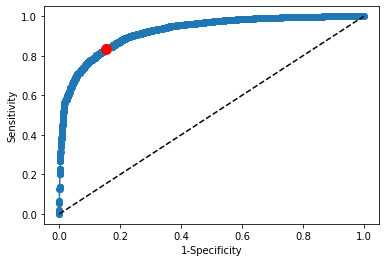

In [ ]:

# 로지스틱 회귀 사용

lgs = LogisticRegression(class_weight='balanced',
                         random_state=42, penalty='l2', C=0.01)
lgs.fit(X_train, y_train)

# # 그리드서치를 통한 하이퍼파라미터 튜닝

params = {'penalty': ['l2', 'l1'],
#           'C': [0.001, 0.01, 0.1, 1, 5, 10]}
grid_CV = GridSearchCV(lgs, param_grid=params, scoring='accuracy', cv=3)
grid_CV.fit(X_train, y_train)

predicted = lgs.predict(X_test)

fpr, tpr, _ = metrics.roc_curve(y_test, (lgs.predict_proba(X_test)[:, 1]))
auc = metrics.auc(fpr, tpr)

print("------------")
print("train score", lgs.score(X_train, y_train))
print("Accuracy: %f" % lgs.score(X_test, y_test))  # checking the accuracy
print("Precision: %f" % metrics.precision_score(y_test, predicted))
print("Recall: %f" % metrics.recall_score(y_test, predicted))
print("F1-Score: %f" % metrics.f1_score(y_test, predicted))
print("AUC: %f" % auc)

cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

# 로지스틱 회귀 ROC curve 그리기
# 빨간점이 cutoff
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted).ravel()
recall = (tp)/(tp+fn)
specificity = (tn)/(fp+tn)

plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall], 'ro', ms=10)  # 현재 cutoff value 값
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [ ]:
#beta, odds 체크
dataset = sampled_X ## dataset찾는게 중요한듯...? column명 나와있는 학습시킨 데이터셋만 찾으면 구할 수 있을거같은데 그걸 모르겠네

column_name = ["const"] + dataset.feature_names.tolist()

beta = np.concatenate([lgs.intercept_,lgs.coef_.reshape(-1)]).round(2) # round(2) 소수점 둘째짜리까지 반올림
odds = np.exp(beta).round(2) 
interpret = np.where(beta>0,'pro-positive','pro-negative') # np.where() 조건문 

# beta 해석 정리
beta_analysis = pd.DataFrame(np.c_[beta,odds,interpret],index=column_name,columns=['beta','odds','interpret'])
beta_analysis

## 6. 카카오맵 기반 긍정/부정 분류 모델을 네이버 리뷰에 적용하기
1. 네이버 데이터에 대해서도 카카오맵과 동일한 전처리
2. 전처리 한 데이터를 가지고, 기존에 학습한 모델을 활용해 Predict 하기
3. 예측한 결과를 저장

### 네이버 리뷰 가져오기
- spell check까지 한 뒤 가져오는걸로

In [ ]:
# 읽어올 데이터의 경로 설정
NAVER_DATA_IN_PATH = 'E:\\pythonfiles\\DataMiningClass\\teamproject\\모델링\\spell_checked\\'
# 데이터를 내보낼 경로 설정
NAVER_DATA_OUT_PATH = 'E:\\pythonfiles\\DataMiningClass\\teamproject\\모델링\\'
# 읽어올 데이터 이름
NAVER_DATA = 'naver_spell_checked_final.csv'

df = pd.read_csv(NAVER_DATA_IN_PATH + NAVER_DATA, encoding='UTF-8')
# df = df.drop(columns=['rating'], axis=1)

In [ ]:
print(df.head())

   Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1             이름  \
0           0             0             0.0  필살기 돈가츠 가로수길점   
1           1             1             1.0  필살기 돈가츠 가로수길점   
2           2             2             2.0  필살기 돈가츠 가로수길점   
3           3             3             3.0  필살기 돈가츠 가로수길점   
4           4             4             4.0  필살기 돈가츠 가로수길점   

                             위치  \
0  서울 강남구 가로수길 14-3 2층 101호 필살기   
1  서울 강남구 가로수길 14-3 2층 101호 필살기   
2  서울 강남구 가로수길 14-3 2층 101호 필살기   
3  서울 강남구 가로수길 14-3 2층 101호 필살기   
4  서울 강남구 가로수길 14-3 2층 101호 필살기   

                                                  리뷰    yr  mnt  day region  \
0  와 너무너무너무너무 맛있게 먹었어요 오랜만에 남편이랑 둘이서 방문했는데 이렇게 부드...  2022    3   30    강남구   
1           맛있게 잘 먹었습니닷 ㅎㅎㅎ 멘체가츠 부드러워용 카레는 살짝 짰어용 ㅠㅠ  2022    5   21    강남구   
2                                      언제먹어도 맛있네요 ㅎㅎ  2022    5    8    강남구   
3  필살기 돈까스 찾은 이후로 진짜 매번 방문했는데 이제서야 영수증 리뷰 써요 ㅠㅠ 가...  2022    4   13    강남구   
4  바삭한 건 없고 튀김이랑 고기랑 

### 긍정/부정 분류해서 '평점'에 넣기

In [ ]:
def naver_score(sentence, tf, model):
  st = sentence
  tf_st = tf.transform([st])
  score = model.predict(tf_st)
  return score

In [ ]:
print(naver_score("이 집 잘하네", tfv, lgs))

[1.]


In [ ]:

df = df.drop_duplicates(subset=['ko_check'])
df = df.dropna()
df = df.reset_index(drop=True)
print(df.head(20))
print(len(df))


    Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1             이름  \
0            0             0             0.0  필살기 돈가츠 가로수길점   
1            1             1             1.0  필살기 돈가츠 가로수길점   
2            2             2             2.0  필살기 돈가츠 가로수길점   
3            3             3             3.0  필살기 돈가츠 가로수길점   
4            4             4             4.0  필살기 돈가츠 가로수길점   
5            5             5             5.0  필살기 돈가츠 가로수길점   
6            6             6             6.0  필살기 돈가츠 가로수길점   
7            7             7             7.0  필살기 돈가츠 가로수길점   
8            8             8             8.0  필살기 돈가츠 가로수길점   
9            9             9             9.0  필살기 돈가츠 가로수길점   
10          10            10            10.0  필살기 돈가츠 가로수길점   
11          11            11            11.0  필살기 돈가츠 가로수길점   
12          12            12            12.0  필살기 돈가츠 가로수길점   
13          13            13            13.0  필살기 돈가츠 가로수길점   
14          14            14            14.0  필살기 돈가츠 가

In [ ]:


for i in range(len(df.index)):
  try:
    sentence = df.loc[i,'ko_check']
    sc = naver_score(sentence, tfv, lgs)
    df.loc[i,'평점'] = sc
  except KeyError:
    pass


final = pd.DataFrame(df, columns=[
                            '이름','위치','리뷰','yr','mnt','day','요일','region','평점','ko_check'])
final.to_csv(NAVER_DATA_OUT_PATH + 'naver_scored_final.csv', encoding='utf-8-sig')